In [1]:
# import libraries
from music21 import *
from random import randint
from copy import deepcopy

In [2]:
# example
m1 = stream.Measure()
m1.append(note.Note('C5'))
part1 = [m1] * 8
m2 = stream.Measure()
m2.append(note.Note('A4'))
part2 = [m2] * 8
m3 = stream.Measure()
m3.append(note.Note('F4'))
part3 = [m3] * 8
# decompose each part into all their measures
parts = [
    part1,
    part2,
    part3
]

In [3]:
# generate sequence
# return a list with element of type (partIndex, numberOfMeasures)
def generateSequence(lenOfParts, numberOfParts, cycle, shift):
    # check arguments
    assert lenOfParts != None
    assert numberOfParts > 0
    assert cycle >= 0
    assert shift >= 0
    # initialize sequence and first part
    sequence = []
    curr = randint(0, numberOfParts - 1)
    # fill in sequence
    for i in range(cycle):
        sequence.append((curr, randint(
            max(lenOfParts[curr] - 1 - i - shift, 1), 
            max(lenOfParts[curr] - 1 - i, 1))))
        next = randint(0, numberOfParts - 1)
        while next == curr:
            next = randint(0, numberOfParts - 1)
        curr = next
    return sequence

In [4]:
def generateStream(parts, sequence):
    # check arguments
    assert parts != None
    assert sequence != None
    # initialize stream
    s = stream.Stream()
    # fill in stream
    for seq in sequence:
        for i in range(seq[1]):
            s.append(deepcopy(parts[seq[0]][i]))
    return s

In [5]:
# generate final stream
def generate(parts, cycle, shift):
    # check arguments
    assert parts != None
    assert cycle >= 0
    assert shift >= 0
    # get some values
    lenOfParts = [len(part) for part in parts]
    numberOfParts = len(parts)
    # generate sequence
    sequence = generateSequence(lenOfParts, numberOfParts, cycle, shift)
    # generate stream
    return generateStream(parts, sequence)
        

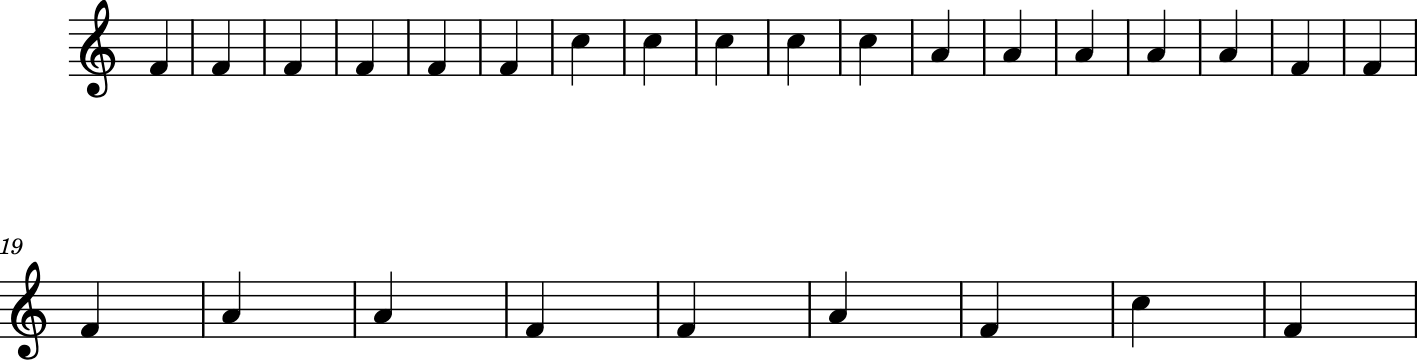

In [6]:
# define the number of transition
cycle = 10
# define the range of randomness for the generation of the number of measures
shift = 1
s = generate(parts, cycle, shift)
s.show()

# Other generation

In [7]:
def generateSequence(nameOfPart, lengthOfPart, maxDuration, limit):
    numberOfPart = len(lengthOfPart)
    curr = randint(0, numberOfPart - 1)
    result = []
    total = 0
    help = 1
    last = 0
    while total < limit:
        entier = randint(maxDuration - 1, maxDuration)
        frac = 0
        if entier != maxDuration:
            frac = randint(0, 3) * 0.25
        time = entier + frac
        while time == last:
            entier = randint(maxDuration - 1, maxDuration)
            frac = 0
            if entier != maxDuration:
                frac = randint(0, 3) * 0.25
            time = entier + frac
        last = time
        if time <= lengthOfPart[curr]:
            result.append((nameOfPart[curr], time))
            total += time
            lengthOfPart[curr] -= time
        next = randint(0, numberOfPart - 1)
        while next == curr or lengthOfPart[next] == 0:
            next = randint(0, numberOfPart - 1)
        curr = next
        if help % 3 == 0 and maxDuration != 1:
            maxDuration -= 1
        help += 1
    return result

In [8]:
nameOfPart = ['Euphoria', 'Melancholy']
lengthOfPart = [32, 32]
maxDuration = 6
limit = 60
sequence = generateSequence(nameOfPart, lengthOfPart, maxDuration, limit)
for part in sequence:
    print(part)

('B', 6)
('A', 5.5)
('B', 5.75)
('A', 5)
('B', 4.0)
('A', 5)
('B', 3.0)
('A', 4)
('B', 3.5)
('A', 3)
('B', 2.25)
('A', 2.5)
('B', 1.5)
('A', 1.25)
('B', 2)
('A', 0.75)
('B', 0.25)
('A', 1)
('B', 0.25)
('A', 0.75)
('B', 1)
('A', 0.75)
('B', 0.5)
('A', 1)


# Clean version

In [9]:
# return a random duration
def getDuration(maxDuration):
    integer = randint(max(maxDuration - 1, 0), maxDuration)
    frac = 0
    if integer != maxDuration or maxDuration == 0:
        frac = randint(0, 3) * 0.25
    return integer + frac

# check if other part have remaining measures
def existOther(nextp, nameOfParts, parts):
    rest = 0
    for part in parts:
        if part != nextp:
            rest += parts[part]
    return rest != 0

# return next part
def getNextPart(curr, numberOfParts, nameOfParts, parts):
    nextp = randint(0, numberOfParts - 1)
    while nextp == curr or parts[nameOfParts[nextp]] == 0:
        nextp = randint(0, numberOfParts - 1)
    return nextp

# generate full sequence 
def generateSequence(parts, maxDuration, total):
    # check arguments
    assert parts != None
    assert maxDuration != None
    assert total != None
    totalDuration = 0
    for part in parts:
        totalDuration += parts[part]
    assert totalDuration - 0.5 >= total
    # define usefull values
    nameOfParts = [name for name in parts]
    numberOfParts = len(nameOfParts)
    # current part (represented by array index)
    curr = randint(0, numberOfParts - 1)
    result = []
    count = 0
    i = 0
    duration = 0
    lastDuration = 0
    # generation
    while count < total:
        # determine the duration of the next measure(s)
        lastDuration = duration
        duration = getDuration(maxDuration)
        while duration == lastDuration or duration == 0:
            duration = getDuration(maxDuration)
        # check that there is enough reamaining measures for current part
        if duration < parts[nameOfParts[curr]]:
            # check if this is only last possibility
            if not existOther(curr, nameOfParts, parts):
                result.append((nameOfParts[curr], total - count))
                return result
            # add section to the result
            result.append((nameOfParts[curr], duration))
            # increment count
            count += duration
            # decrement remaining measures for current part
            parts[nameOfParts[curr]] -= duration
        # select next part
        curr = getNextPart(curr, numberOfParts, nameOfParts, parts)
        # update maxDuration every 3 cycles
        if i % 4 == 0 and maxDuration != 0:
            maxDuration -= 1
        i += 1
    return result

In [17]:
parts = {
    "A": 32,
    "B": 32,
}
maxDuration = 6
total = 32

sequence = generateSequence(parts, maxDuration, total)
for part in sequence:
    print(part)

('B', 5.75)
('A', 4.25)
('B', 4.5)
('A', 5)
('B', 4.5)
('A', 3.0)
('B', 4)
('A', 3.0)
